In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans


from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer,mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import cohen_kappa_score

In [2]:
data = pd.read_csv('VMResourceUtilizationSlope.csv')
data.shape

(9610, 44)

In [3]:
data = data.dropna()
data.shape

(9594, 44)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9594 entries, 0 to 9608
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LAST_POLL                 9594 non-null   int64  
 1   VMID                      9594 non-null   int64  
 2   UUID                      9594 non-null   object 
 3   dom                       9594 non-null   object 
 4   rxbytes_slope             9594 non-null   float64
 5   rxpackets_slope           9594 non-null   float64
 6   rxerrors_slope            9594 non-null   float64
 7   rxdrops_slope             9594 non-null   float64
 8   txbytes_slope             9594 non-null   float64
 9   txpackets_slope           9594 non-null   float64
 10  txerrors_slope            9594 non-null   float64
 11  txdrops_slope             9594 non-null   float64
 12  timecpu_slope             9594 non-null   float64
 13  timesys_slope             9594 non-null   float64
 14  timeusr_

In [16]:
#check null values
data.isna().sum()

LAST_POLL                   0
VMID                        0
UUID                        0
dom                         0
rxbytes_slope               0
rxpackets_slope             0
rxerrors_slope              0
rxdrops_slope               0
txbytes_slope               0
txpackets_slope             0
txerrors_slope              0
txdrops_slope               0
timecpu_slope               0
timesys_slope               0
timeusr_slope               0
state_slope                 0
memmax_slope                0
mem_slope                   0
cpus_slope                  0
cputime_slope               0
memactual_slope             0
memswap_in_slope            0
memswap_out_slope           0
memmajor_fault_slope        0
memminor_fault_slope        0
memunused_slope             0
memavailable_slope          0
memusable_slope             0
memlast_update_slope        0
memdisk_cache_slope         0
memhugetlb_pgalloc_slope    0
memhugetlb_pgfail_slope     0
memrss_slope                0
vdard_req_

In [6]:
data.head()

,LAST_POLL,VMID,UUID,dom,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,...,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope,Status
0,1604455173,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,88.2065,30.1414,0.0,0.0,79.8981,5.5275,...,0.0,24.3045,89.9850,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,1604455142,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8708,27.3499,0.0,0.0,0.0000,0.0000,...,0.0,5.9061,89.8986,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,1604455113,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8865,27.2996,0.0,0.0,0.0000,0.0000,...,0.0,32.8285,89.9897,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,1604455082,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8760,27.4076,0.0,0.0,0.0000,0.0000,...,0.0,4.2364,89.8741,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,1604455055,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.7241,25.8210,0.0,0.0,0.0000,0.0000,...,0.0,22.7510,89.9864,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [37]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LAST_POLL,9594.0,1.604482e+09,81628.464301,1.604406e+09,1.604424e+09,1.604442e+09,1.604589e+09,1.604636e+09
VMID,9594.0,7.551178e+00,1.731400,1.000000e+00,6.000000e+00,8.000000e+00,9.000000e+00,1.000000e+01
rxbytes_slope,9594.0,8.823780e+01,0.779002,5.839250e+01,8.779740e+01,8.795460e+01,8.826430e+01,8.999990e+01
rxpackets_slope,9594.0,3.545452e+01,18.590801,1.789900e+00,2.656510e+01,2.807250e+01,3.096380e+01,8.991570e+01
rxerrors_slope,9594.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
rxdrops_slope,9594.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
txbytes_slope,9594.0,3.175595e+01,41.176777,0.000000e+00,0.000000e+00,0.000000e+00,8.127520e+01,9.000000e+01
txpackets_slope,9594.0,2.227285e+01,36.895174,0.000000e+00,0.000000e+00,0.000000e+00,2.378200e+01,8.999820e+01
txerrors_slope,9594.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
txdrops_slope,9594.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


<AxesSubplot:xlabel='Status', ylabel='count'>

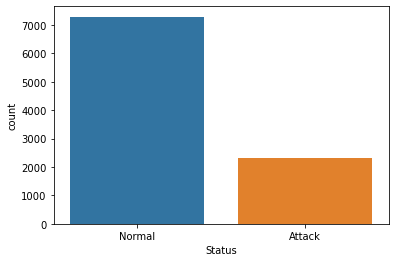

In [17]:
sns.countplot(x='Status',data=data)

In [18]:
colors =['#069AF3','#FF4500','#3f88c5','#ffba08','#d00000']
fig = go.Figure(go.Pie(labels=['Normal','Attack'],values=data.Status.value_counts(),name='Attack'))
fig.update_traces(hole=.4, hoverinfo="label+percent", textfont_size=16,marker={'colors':colors})
fig.update_layout(height=400, width=400, title_text='<b style="color:#000000;">Percentage of Attack</b>')
fig.show()

In [19]:
data['Status'].value_counts()

Normal    7288
Attack    2306
Name: Status, dtype: int64

In [20]:
df = data.drop(['LAST_POLL', 'VMID', 'UUID','dom'], axis=1)

In [21]:
df.head()

,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,txerrors_slope,txdrops_slope,timecpu_slope,timesys_slope,...,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope,Status
0,88.2065,30.1414,0.0,0.0,79.8981,5.5275,0.0,0.0,0.0000,0.0,...,0.0,24.3045,89.9850,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,87.8708,27.3499,0.0,0.0,0.0000,0.0000,0.0,0.0,73.8278,0.0,...,0.0,5.9061,89.8986,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,87.8865,27.2996,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0,...,0.0,32.8285,89.9897,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,87.8760,27.4076,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0,...,0.0,4.2364,89.8741,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,87.7241,25.8210,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0,...,0.0,22.7510,89.9864,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [22]:
df["Status"] = df.Status.replace({"Normal":0, "Attack": 1})

In [23]:
df.tail()

,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,txerrors_slope,txdrops_slope,timecpu_slope,timesys_slope,...,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope,Status
9604,88.0519,29.5388,0.0,0.0,90.0,89.9974,0.0,0.0,73.3008,23.4287,...,0.0,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1
9605,88.7897,30.9638,0.0,0.0,90.0,89.9974,0.0,0.0,0.0000,21.8014,...,0.0,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1
9606,88.0519,29.5388,0.0,0.0,90.0,89.9977,0.0,0.0,0.0000,26.5651,...,0.0,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1
9607,89.1474,45.9392,0.0,0.0,90.0,89.9950,0.0,0.0,0.0000,13.1340,...,0.0,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1
9608,87.7974,26.5651,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,...,0.0,20.1363,89.965,0.0,0.0,0.0,0.0,0.0,0.0,1


In [24]:
df.corr()

,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,txerrors_slope,txdrops_slope,timecpu_slope,timesys_slope,...,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope,Status
rxbytes_slope,1.000000,0.891586,NaN,NaN,0.578981,0.583399,NaN,NaN,-0.144068,-0.025594,...,0.069281,-0.084335,-0.207916,NaN,0.005258,-0.000407,NaN,NaN,NaN,0.578740
rxpackets_slope,0.891586,1.000000,NaN,NaN,0.576056,0.643415,NaN,NaN,-0.187989,-0.069083,...,0.056020,-0.132336,-0.252219,NaN,0.004506,-0.000433,NaN,NaN,NaN,0.648451
rxerrors_slope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rxdrops_slope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
txbytes_slope,0.578981,0.576056,NaN,NaN,1.000000,0.718074,NaN,NaN,-0.090669,0.321457,...,0.042840,-0.142722,-0.341960,NaN,-0.017118,-0.019293,NaN,NaN,NaN,0.669029
txpackets_slope,0.583399,0.643415,NaN,NaN,0.718074,1.000000,NaN,NaN,-0.129637,0.494008,...,0.000598,-0.280390,-0.543437,NaN,-0.013400,-0.015102,NaN,NaN,NaN,0.982704
txerrors_slope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
txdrops_slope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timecpu_slope,-0.144068,-0.187989,NaN,NaN,-0.090669,-0.129637,NaN,NaN,1.000000,0.007230,...,0.049312,0.227789,0.099803,NaN,0.004550,0.010084,NaN,NaN,NaN,-0.152591
timesys_slope,-0.025594,-0.069083,NaN,NaN,0.321457,0.494008,NaN,NaN,0.007230,1.000000,...,-0.034306,-0.163256,-0.321277,NaN,0.000534,-0.000919,NaN,NaN,NaN,0.478070


Text(0.5, 1.0, 'Feature Correlation Heatmap')

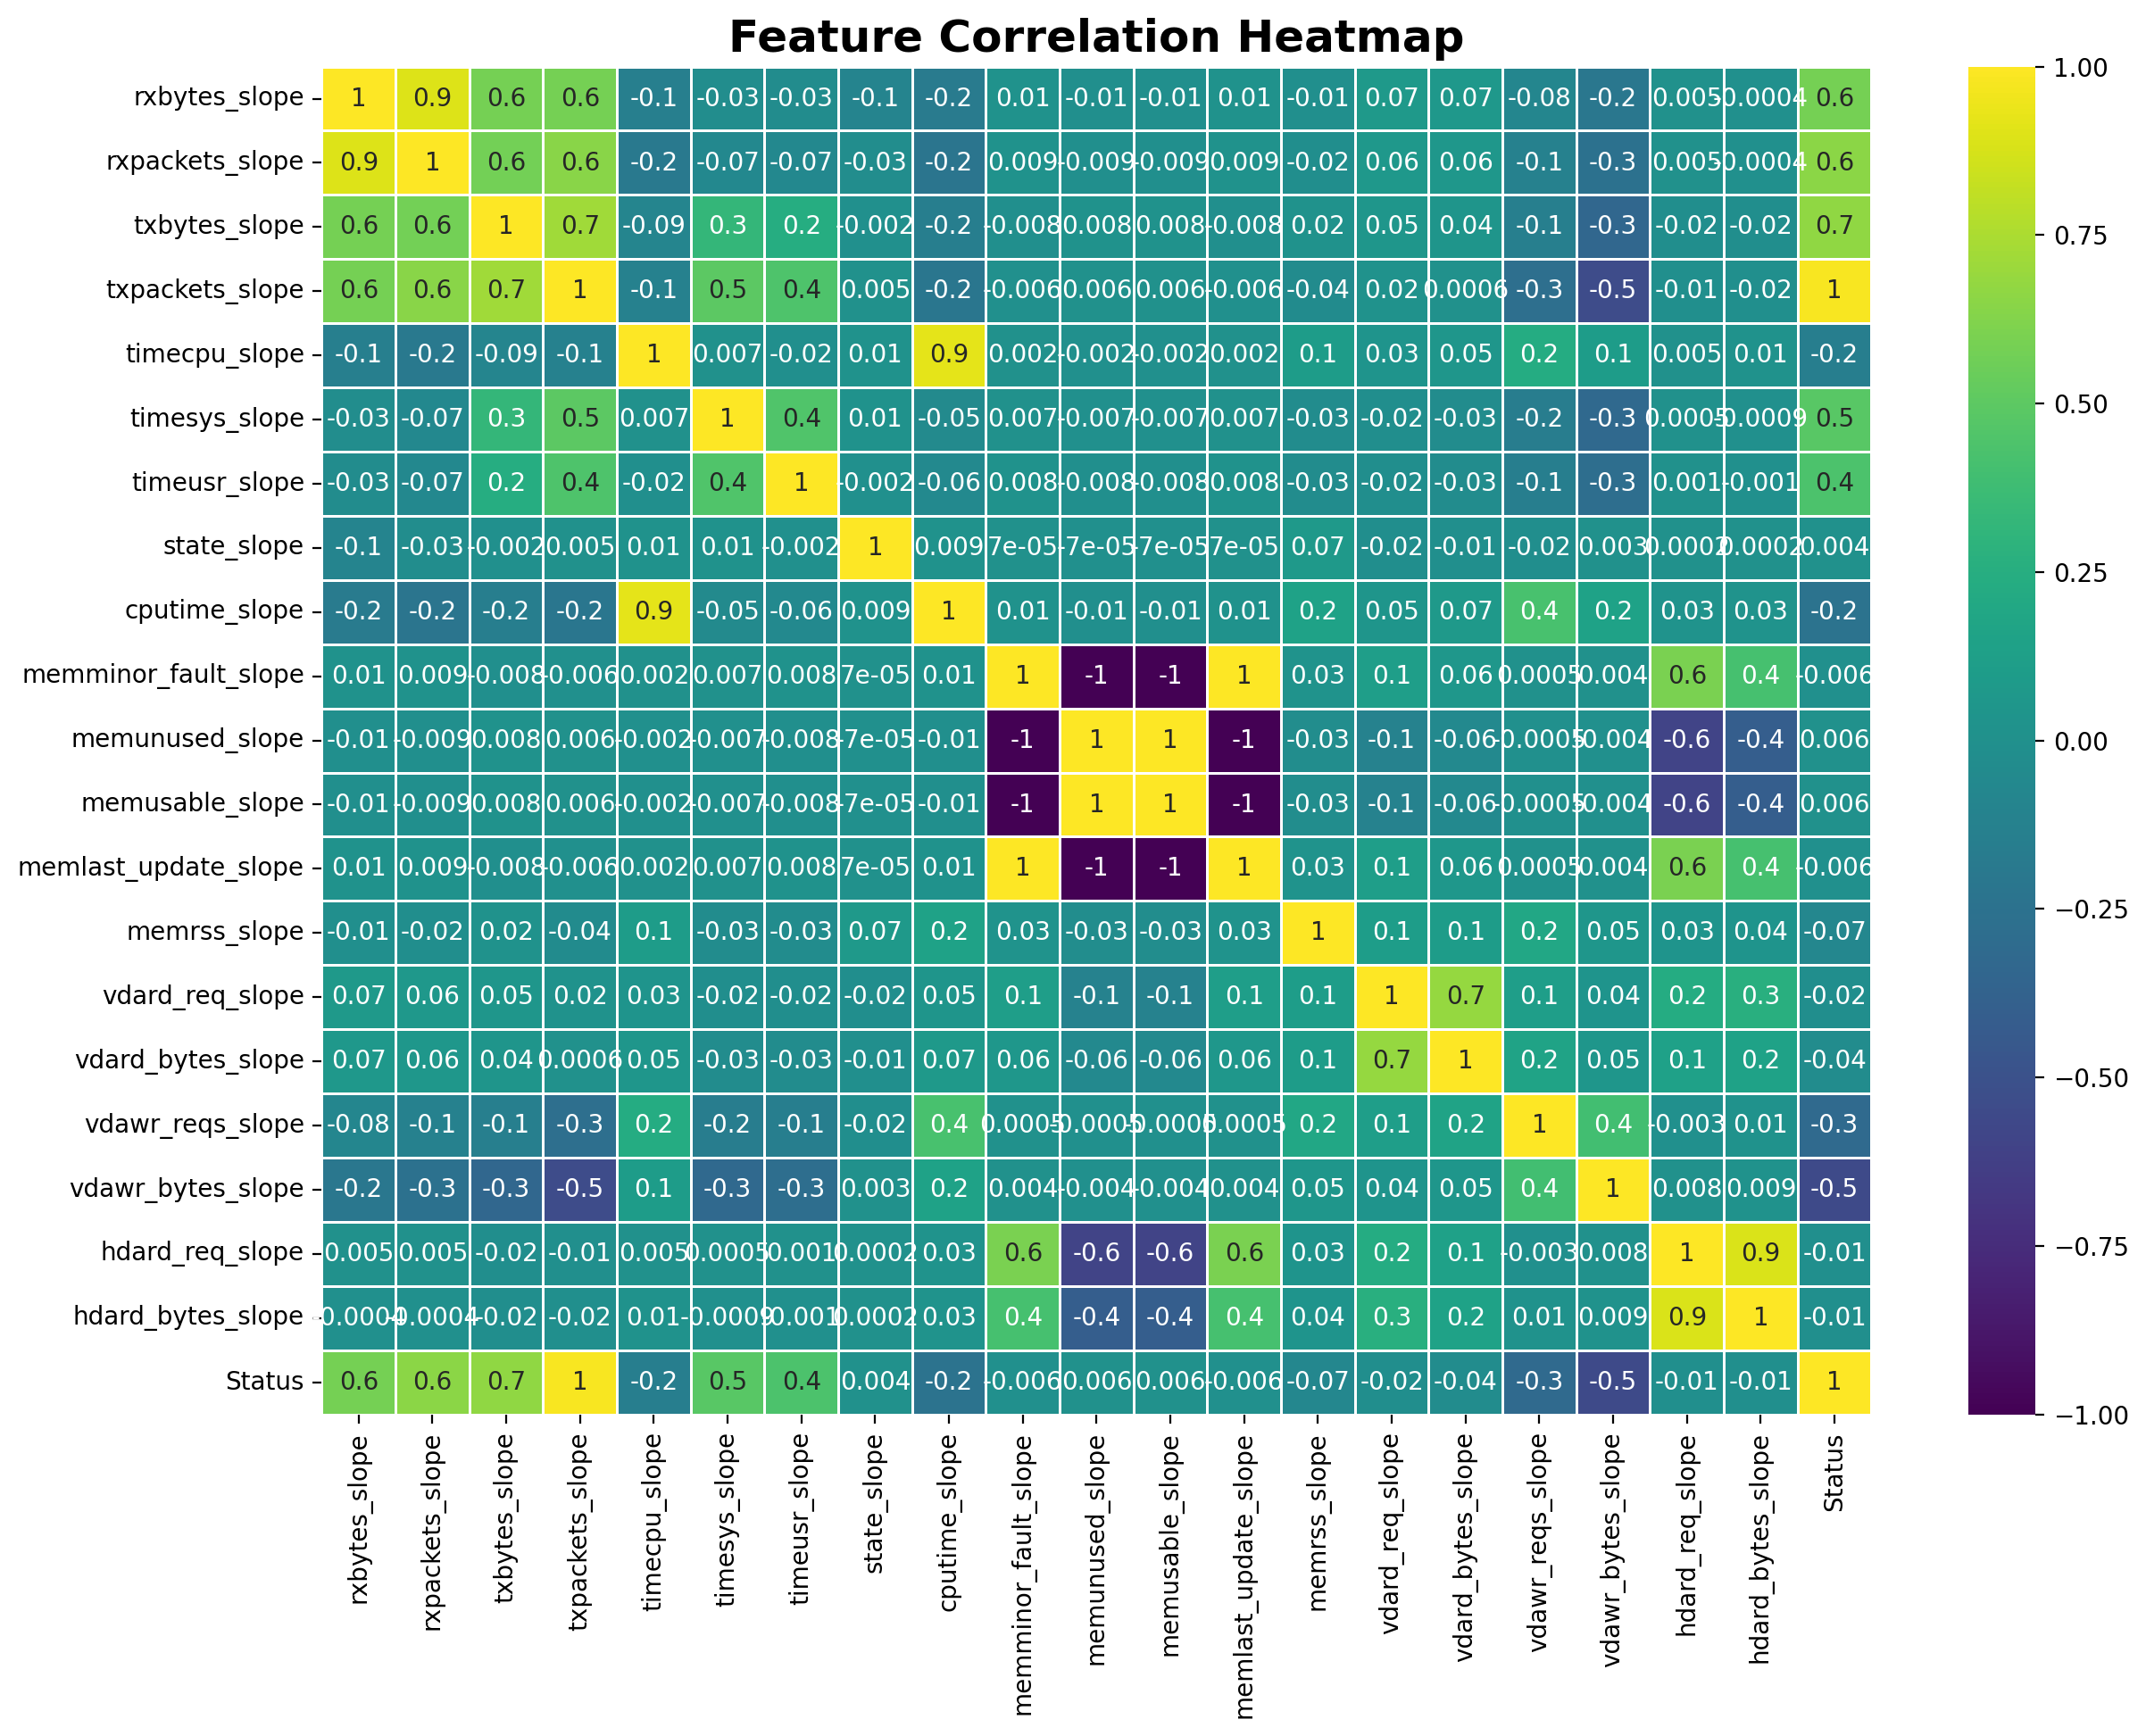

In [27]:
plt.figure(figsize=(14,10), dpi = 200)
sns.heatmap(df.drop(['rxerrors_slope', 'rxdrops_slope', 'txerrors_slope', 'txdrops_slope', 'memmax_slope',
                     'mem_slope','cpus_slope','memactual_slope','memswap_in_slope', 'memswap_out_slope',
                     'memmajor_fault_slope', 'memavailable_slope', 'memdisk_cache_slope','memhugetlb_pgalloc_slope',
                     'memhugetlb_pgfail_slope', 'vdaerror_slope', 'hdawr_reqs_slope', 'hdawr_bytes_slope','hdaerror_slope' 
                     ] , axis=1).corr(), linewidth=0.5,annot=True,fmt='.1g', cmap="viridis")
plt.title("Feature Correlation Heatmap", fontsize = 18, fontweight='bold')

In [45]:
X = df.drop(['Status'], axis=1)

In [68]:
y = df['Status']
class_le = LabelEncoder()
y = class_le.fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [69]:
scaler = StandardScaler()

In [70]:
scaled_X = scaler.fit_transform(X)

In [71]:
#K-means for EDA
km = KMeans(n_clusters=2,
           init='k-means++',
           n_init=10,
           max_iter=300,
           random_state=1)
y_km = km.fit_predict(scaled_X)

In [50]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_km))

Mean squared error: 0.99


In [51]:
X_train, X_test,y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state =1,stratify=y)

In [52]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=1)

In [55]:
y_pred = tree.predict(X_test)

In [56]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                      index= ['True[0]','True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],2186,1
True[1],1,691


In [57]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2187
           1       1.00      1.00      1.00       692

    accuracy                           1.00      2879
   macro avg       1.00      1.00      1.00      2879
weighted avg       1.00      1.00      1.00      2879



In [58]:
print('kappa_statistic')
print(cohen_kappa_score(y_test, y_pred))

kappa_statistic
0.9980976659239701


In [59]:
logistic = LogisticRegression(solver='liblinear', penalty='l2', C= 1, random_state=1)
logistic.fit(X_train, y_train)

LogisticRegression(C=1, random_state=1, solver='liblinear')

In [60]:
from joblib import dump, load
dump(logistic, 'final_model.joblib')
loaded_model = load('final_model.joblib')

In [72]:
y_pred = loaded_model.predict(X_test) 

In [73]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                      index= ['True[0]','True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],2182,5
True[1],1,691


In [74]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2187
           1       0.99      1.00      1.00       692

    accuracy                           1.00      2879
   macro avg       1.00      1.00      1.00      2879
weighted avg       1.00      1.00      1.00      2879



In [75]:
print('kappa_statistic')
print(cohen_kappa_score(y_test, y_pred))

kappa_statistic
0.9943042507422214


In [76]:
bnb=BernoulliNB(class_prior=[0.5,0.5], alpha=1 )
bnb.fit(X_train, y_train)

BernoulliNB(alpha=1, class_prior=[0.5, 0.5])

In [77]:
y_pred = bnb.predict(X_test)

In [78]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                      index= ['True[0]','True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],2099,88
True[1],15,677


In [79]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2187
           1       0.88      0.98      0.93       692

    accuracy                           0.96      2879
   macro avg       0.94      0.97      0.95      2879
weighted avg       0.97      0.96      0.96      2879



In [85]:
print('kappa_statistic')
print(cohen_kappa_score(y_test, y_pred))

kappa_statistic
0.9054392889156467


In [86]:
svc = SVC(class_weight='balanced')

In [87]:
scaler = StandardScaler()

In [88]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [89]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}
grid = GridSearchCV(svc,param_grid)

In [90]:
#Support Vector Machine
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [91]:
grid.best_params_

{'C': 1, 'gamma': 'auto'}

In [92]:
grid_pred = grid.predict(scaled_X_test)

In [125]:
confusion_matrix(y_test,grid_pred)

array([[ 691,    1],
       [  10, 2177]], dtype=int64)

In [126]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       692
           1       1.00      1.00      1.00      2187

    accuracy                           1.00      2879
   macro avg       0.99      1.00      0.99      2879
weighted avg       1.00      1.00      1.00      2879



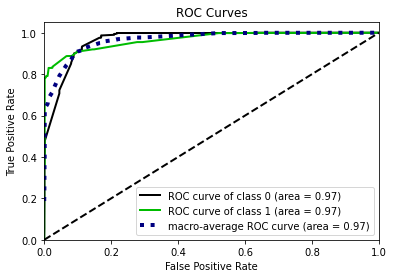

In [127]:
skplt.metrics.plot_roc(y_test, bnb.predict_proba(X_test), plot_micro=False)
plt.show()

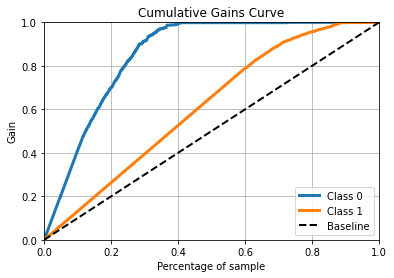

In [128]:
skplt.metrics.plot_cumulative_gain(y_test, bnb.predict_proba(X_test))
plt.show()

In [129]:
print('accuracy : %3f' % accuracy_score(y_test, grid_pred))

accuracy : 0.996179


In [131]:
print('kappa_statistic')
print(cohen_kappa_score(y_test, grid_pred))

kappa_statistic
0.9895834669566416
